In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("../../mapped_df.csv", index_col=0)

df["success"] = df["success"].map({"Yes": True, "No": False})

In [24]:
def plot_success(df, col, xlabel, col_order=None):
    _, ax = plt.subplots(figsize=(7, 4))

    sns.countplot(df, x=col, hue="success", order=col_order, ax=ax)

    ax2 = ax.twinx()
    ct = pd.crosstab(df[col], df["success"], normalize="index")

    if col_order is None:
        ax2.scatter(ct.index.values, ct.iloc[:, 1], c="k")
    else:
        ax2.plot(col_order, ct.loc[col_order, True], c="k", marker="o")

    ax.tick_params(axis="x", labelrotation=15)
    ax.set_xlabel(xlabel)
    ax2.set_ylabel("Success rate")
    ax2.set_ylim(np.min([ct.iloc[:, 1].min() - 0.1, 0.5]), 1.1)

    plt.tight_layout()
    plt.show()

def plot_success_numerical(df, col, xlabel, bins=5, q=False):
    _, ax = plt.subplots(figsize=(7, 4))

    tdf = df.copy()
    if q:
        tdf[col] = pd.qcut(df[col], q=bins)
    else:
        tdf[col] = pd.cut(df[col], bins=bins)
    sns.countplot(tdf, x=col, hue="success", ax=ax)

    ax2 = ax.twinx()
    ct = pd.crosstab(tdf[col], tdf["success"], normalize="index")

    ax2.scatter(ct.index.astype(str), ct.iloc[:, 1].values, c="k")

    ax.tick_params(axis="x", labelrotation=25)
    ax.set_xlabel(xlabel)
    ax2.set_ylabel("Success rate")
    ax2.set_ylim(np.min([ct.iloc[:, 1].values.min() - 0.1, 0.5]), 1.1)

    plt.tight_layout()
    plt.show()

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 783913 entries, 0 to 783912
Data columns (total 24 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   county_code                     783913 non-null  float64
 1   conforming_loan_limit           783913 non-null  object 
 2   success                         783913 non-null  bool   
 3   purchaser_type                  783913 non-null  object 
 4   loan_type                       783913 non-null  object 
 5   loan_purpose                    783913 non-null  object 
 6   lien_status                     783913 non-null  object 
 7   open-end_line_of_credit         783913 non-null  object 
 8   business_or_commercial_purpose  783913 non-null  object 
 9   loan_amount                     783913 non-null  float64
 10  loan_to_value_ratio             783913 non-null  float64
 11  loan_term                       783913 non-null  float64
 12  interest_only_payment

In [18]:
df.columns.tolist()

['county_code',
 'conforming_loan_limit',
 'success',
 'purchaser_type',
 'loan_type',
 'loan_purpose',
 'lien_status',
 'open-end_line_of_credit',
 'business_or_commercial_purpose',
 'loan_amount',
 'loan_to_value_ratio',
 'loan_term',
 'interest_only_payment',
 'balloon_payment',
 'property_value',
 'construction_method',
 'occupancy_type',
 'total_units',
 'income',
 'debt_to_income_ratio',
 'applicant_ethnicity',
 'applicant_race',
 'applicant_sex',
 'applicant_age']

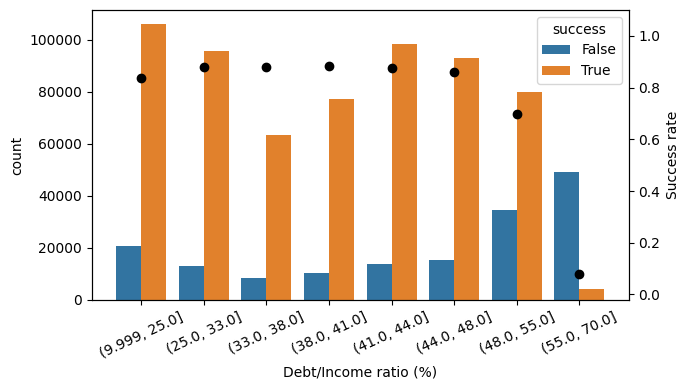

In [50]:
plot_success_numerical(df, "debt_to_income_ratio", "Debt/Income ratio (%)", bins=8, q=True)

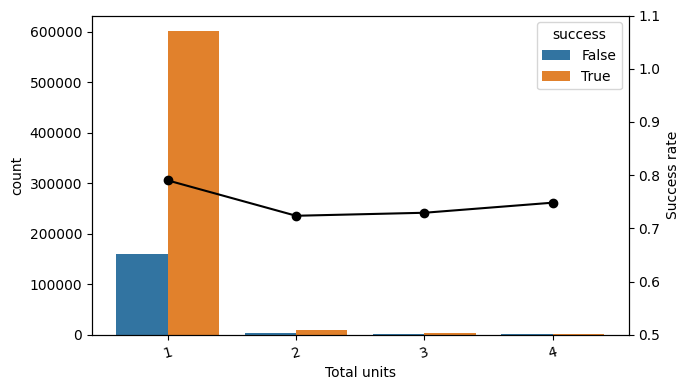

In [41]:
tdf = df[['total_units', 'success']].copy()
tdf['total_units'] = [str(x) for x in tdf['total_units'].values]
plot_success(tdf, "total_units", "Total units", col_order=[str(x) for x in [1,2,3,4]])

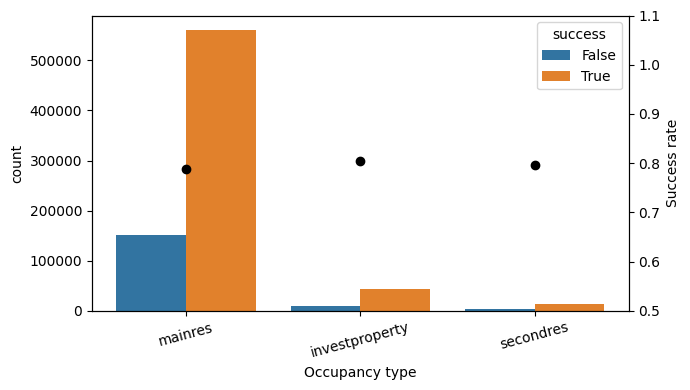

In [34]:
plot_success(df, "occupancy_type", "Occupancy type")

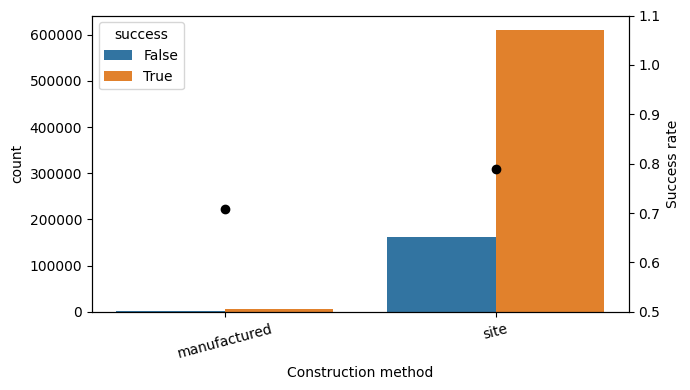

In [33]:
plot_success(df, "construction_method", "Construction method")

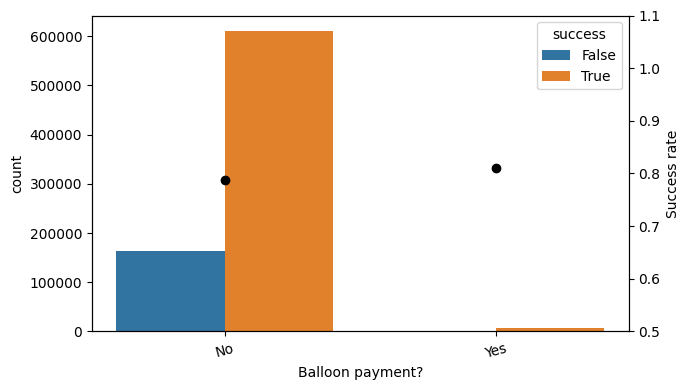

In [32]:
plot_success(df, "balloon_payment", "Balloon payment?")

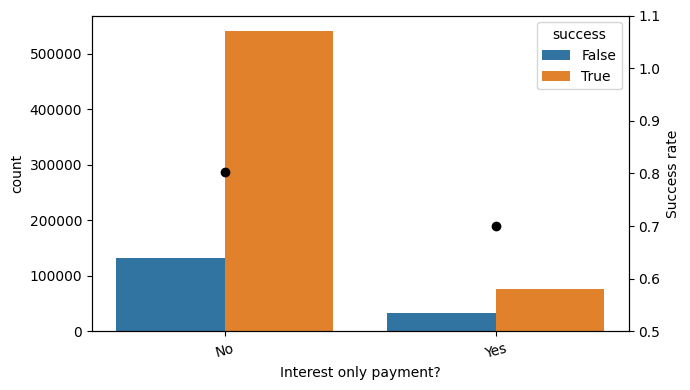

In [31]:
plot_success(df, "interest_only_payment", "Interest only payment?")

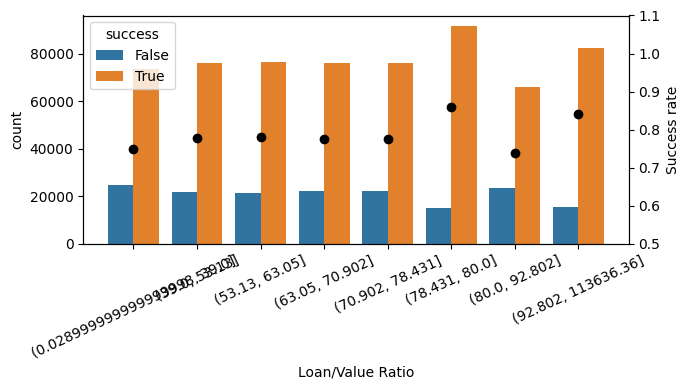

In [29]:
plot_success_numerical(df, "loan_to_value_ratio", "Loan/Value Ratio", bins=8, q=True)

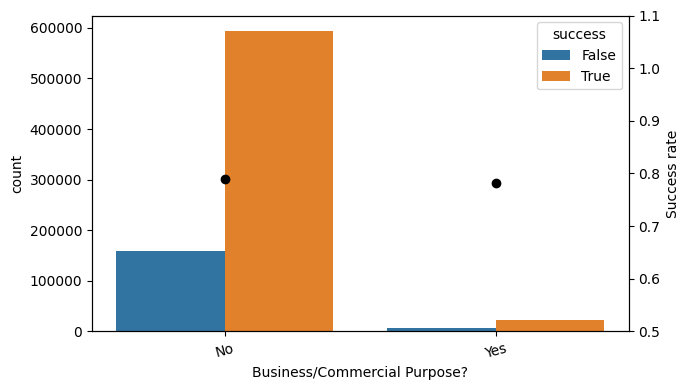

In [30]:
plot_success(df, "business_or_commercial_purpose", "Business/Commercial Purpose?")

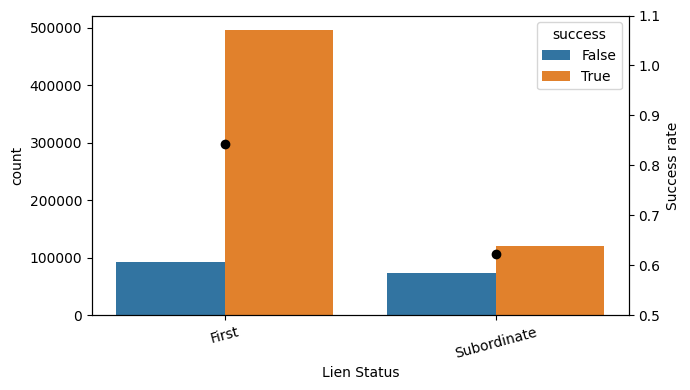

In [22]:
plot_success(df, "lien_status", "Lien Status")

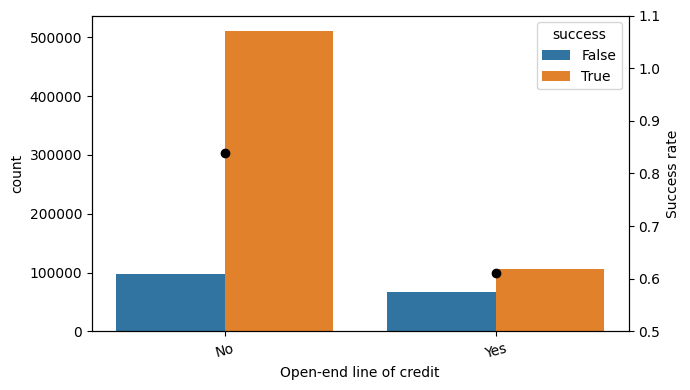

In [ ]:
plot_success(df, "open-end_line_of_credit", "Open-end line of credit")

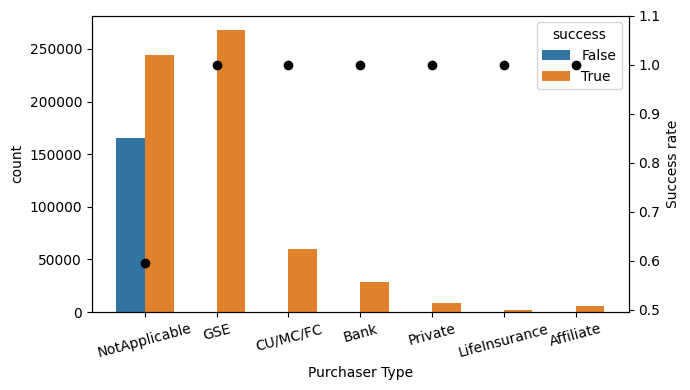

In [21]:
plot_success(df, "purchaser_type", "Purchaser Type")

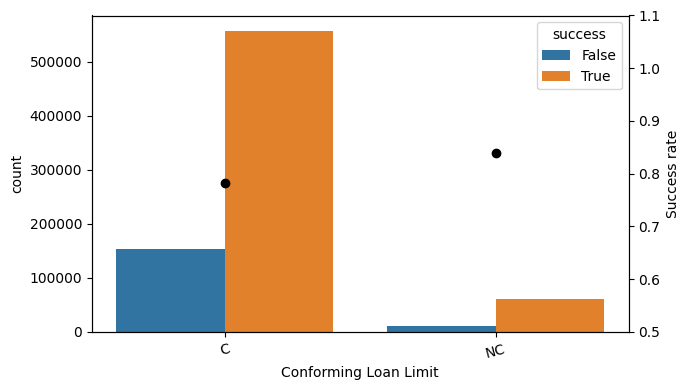

In [17]:
plot_success(df, "conforming_loan_limit", "Conforming Loan Limit")

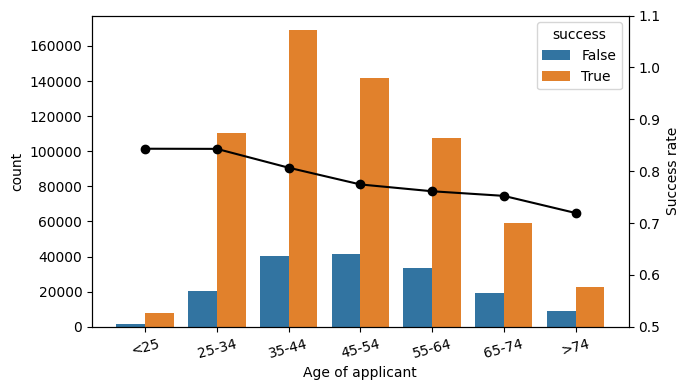

In [5]:
plot_success(
    df,
    "applicant_age",
    "Age of applicant",
    col_order=["<25", "25-34", "35-44", "45-54", "55-64", "65-74", ">74"],
)

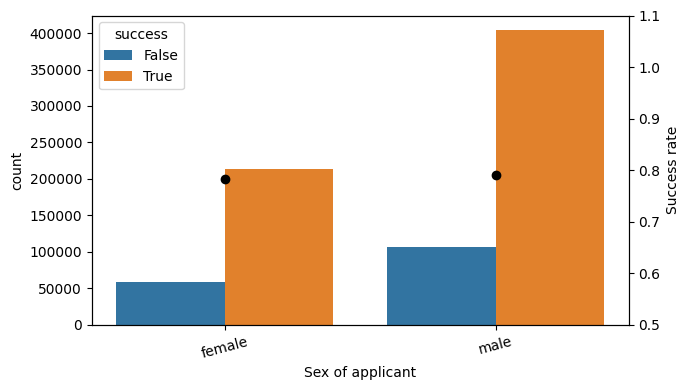

In [6]:
plot_success(df, "applicant_sex", "Sex of applicant")

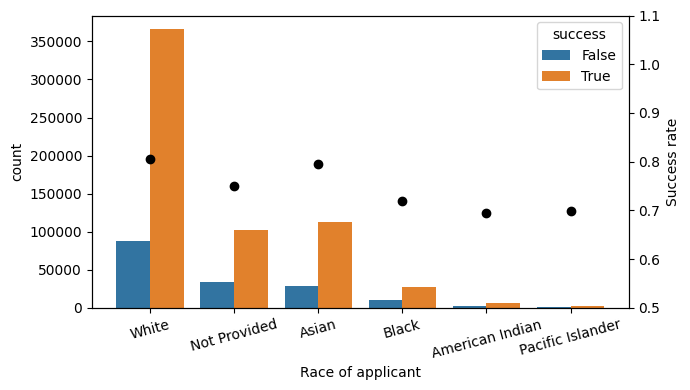

In [7]:
plot_success(
    df,
    "applicant_race",
    "Race of applicant",
)

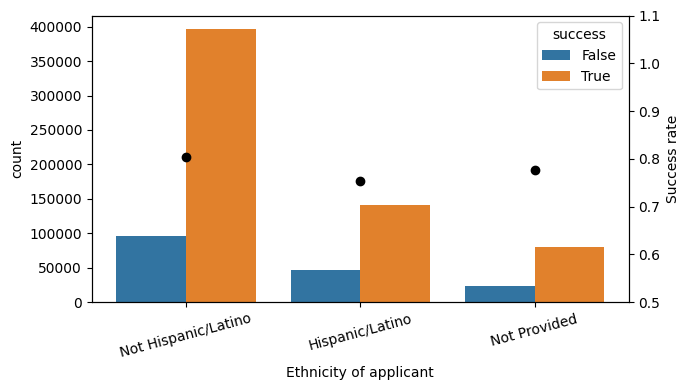

In [8]:
plot_success(df, "applicant_ethnicity", "Ethnicity of applicant")

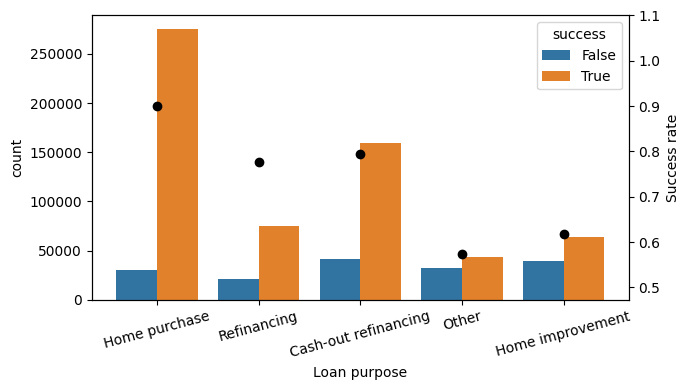

In [9]:
plot_success(df, "loan_purpose", "Loan purpose")

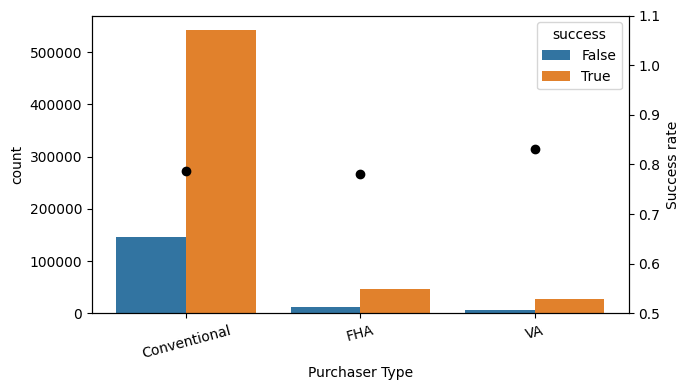

In [10]:
plot_success(df, "loan_type", "Loan Type")

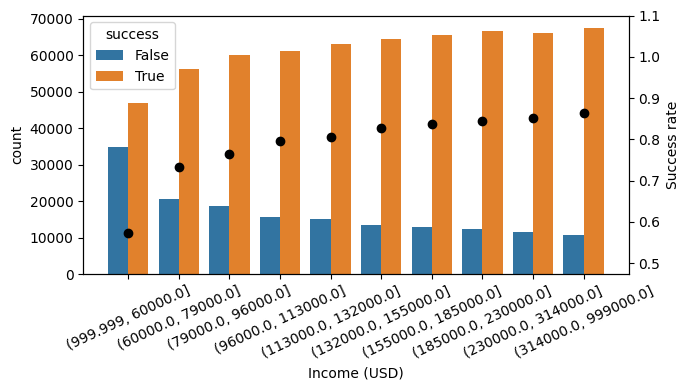

In [13]:
plot_success_numerical(df, "income", "Income (USD)", bins=10, q=True)

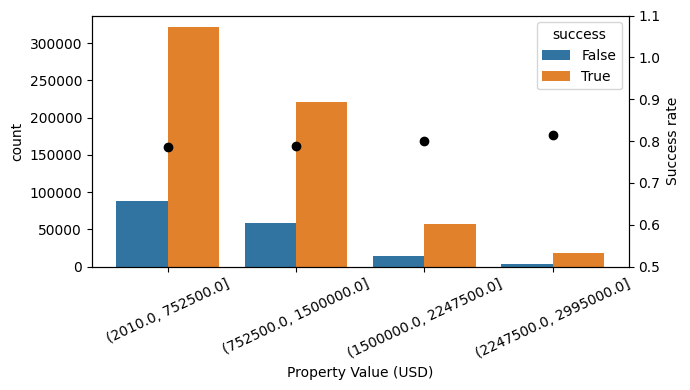

In [14]:
plot_success_numerical(df, "property_value", "Property Value (USD)", bins=4, q=False)

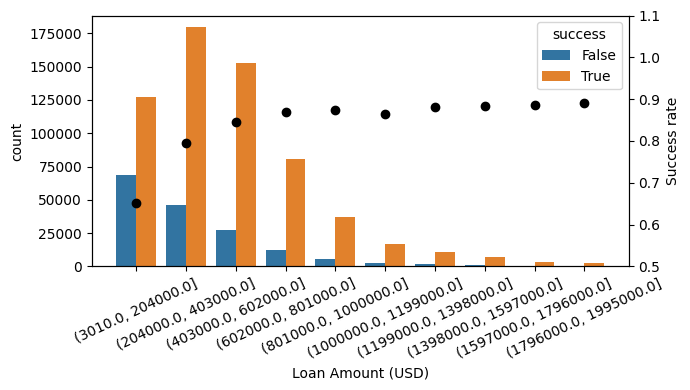

In [15]:
plot_success_numerical(df, "loan_amount", "Loan Amount (USD)", bins=10, q=False)

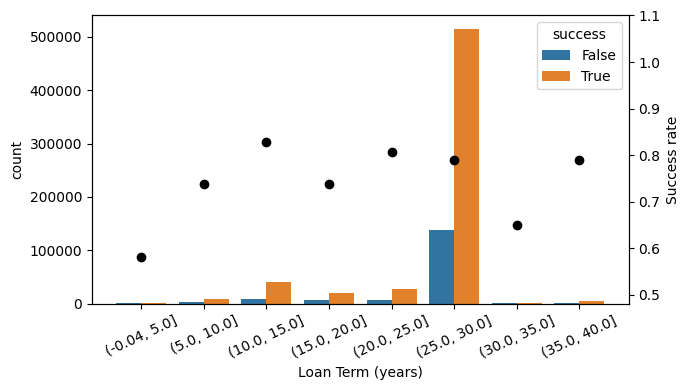

In [16]:
tdf = df[["loan_term", "success"]].copy()
tdf["loan_term"] = np.array([int(x) for x in tdf.loc[:, "loan_term"].values])
tdf['loan_term'].value_counts()
plot_success_numerical(tdf, "loan_term", "Loan Term (years)", bins=8, q=False)